[Quora-1.png](attachment:Quora-1.png)

In [0]:
!pip install pydrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
  
def get_file_names():

  # 1. Authenticate and create the PyDrive client.
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)
  file_list = drive.ListFile({'q': "'1YcgZRsNxIBYTx1D7Y4_FfqhsmdYSPiuy' in parents and trashed=false"}).GetList()
  for file1 in file_list:
    print('title: %s, id: %s' % (file1['title'], file1['id']))
    
    
    
def get_file_into_colab(file_id,file_name):
  
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)
  amazon = drive.CreateFile({'id': file_id})
  amazon.GetContentFile(file_name)
  print(" Congrats ! Now You can import file into Pandas DataFrame !")

     |████████████████████████████████| 993kB 5.1MB/s 
  Created wheel for pydrive: filename=PyDrive-1.3.1-cp36-none-any.whl size=27435 sha256=421e707738df21509f64483974d66c8b9d5d898dd571713432c918af6af6a22c
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built pydrive


In [0]:
get_file_names()

In [0]:

get_file_into_colab('1u-3mg3uPVWJgJWDGS_VG0soCr4EXc8uY','train_quora.csv')
get_file_into_colab('1wEYi4SQHhYvmHnTwWrdwKnp3oIAtr6hj','test_quora.csv')


 Congrats ! Now You can import file into Pandas DataFrame !
 Congrats ! Now You can import file into Pandas DataFrame !


**Note:-** Above stuffs are for getting files loaded into drive so that we can use it in google colab.


<h1 style="text-align:center;font-size:30px;" > Quora Question Pairs </h1>

<h1> 1. Business Problem </h1>

<h2> 1.1 Description </h2>

<p>Quora is a place to gain and share knowledge—about anything. It’s a platform to ask questions and connect with people who contribute unique insights and quality answers. This empowers people to learn from each other and to better understand the world.</p>
<p>
Over 100 million people visit Quora every month, so it's no surprise that many people ask similarly worded questions. Multiple questions with the same intent can cause seekers to spend more time finding the best answer to their question, and make writers feel they need to answer multiple versions of the same question. Quora values canonical questions because they provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.
</p>
<br>
> Credits: Kaggle 


__ Problem Statement __
- Identify which questions asked on Quora are duplicates of questions that have already been asked. 
- This could be useful to instantly provide answers to questions that have already been answered. 
- We are tasked with predicting whether a pair of questions are duplicates or not. 

<h2> 1.2 Sources/Useful Links</h2>

- Source : https://www.kaggle.com/c/quora-question-pairs
<br><br>____ Useful Links ____
- Discussions : https://www.kaggle.com/anokas/data-analysis-xgboost-starter-0-35460-lb/comments
- Kaggle Winning Solution and other approaches: https://www.dropbox.com/sh/93968nfnrzh8bp5/AACZdtsApc1QSTQc7X0H3QZ5a?dl=0
- Blog 1 : https://engineering.quora.com/Semantic-Question-Matching-with-Deep-Learning
- Blog 2 : https://towardsdatascience.com/identifying-duplicate-questions-on-quora-top-12-on-kaggle-4c1cf93f1c30

<h2>1.3 Real world/Business Objectives and Constraints </h2>

1. The cost of a mis-classification can be very high.
2. You would want a probability of a pair of questions to be duplicates so that you can choose any threshold of choice.
3. No strict latency concerns.
4. Interpretability is partially important.

<h1>2. Machine Learning Probelm </h1>

<h2> 2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

<p> 
- Data will be in a file Train.csv <br>
- Train.csv contains 5 columns : qid1, qid2, question1, question2, is_duplicate <br>
- Size of Train.csv - 60MB <br>
- Number of rows in Train.csv = 404,290
</p>

<h3> 2.1.2 Example Data point </h3>

<pre>
"id","qid1","qid2","question1","question2","is_duplicate"
"0","1","2","What is the step by step guide to invest in share market in india?","What is the step by step guide to invest in share market?","0"
"1","3","4","What is the story of Kohinoor (Koh-i-Noor) Diamond?","What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?","0"
"7","15","16","How can I be a good geologist?","What should I do to be a great geologist?","1"
"11","23","24","How do I read and find my YouTube comments?","How can I see all my Youtube comments?","1"
</pre>

<h2> 2.2 Mapping the real world problem to an ML problem </h2>

<h3> 2.2.1 Type of Machine Leaning Problem </h3>

<p> It is a binary classification problem, for a given pair of questions we need to predict if they are duplicate or not. </p>

<h3> 2.2.2 Performance Metric </h3>

Source: https://www.kaggle.com/c/quora-question-pairs#evaluation

Metric(s): 
* log-loss : https://www.kaggle.com/wiki/LogarithmicLoss
* Binary Confusion Matrix

<h2> 2.3 Train and Test Construction </h2>

<p>  </p>
<p> We build train and test by randomly splitting in the ratio of 70:30 or 80:20 whatever we choose as we have sufficient points to work with. </p>

<h1>3. Exploratory Data Analysis </h1>

In [0]:
! pip install distance

     |████████████████████████████████| 184kB 4.9MB/s 
  Created wheel for distance: filename=Distance-0.1.3-cp36-none-any.whl size=16261 sha256=3d806bce6bb5ab60ca32122f5fad7477f4534b4343a5cf725381391432f1dafc
  Stored in directory: /root/.cache/pip/wheels/d5/aa/e1/dbba9e7b6d397d645d0f12db1c66dbae9c5442b39b001db18e
Successfully built distance


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

import re
from nltk.corpus import stopwords
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup

<h2> 3.1 Reading data and basic stats </h2>

In [0]:
df = pd.read_csv("train_quora.csv")
# let's consider only 100k datapoints
df=df[:100000] 

print("Number of data points:",df.shape[0])

Number of data points: 100000


In [0]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
id              100000 non-null int64
qid1            100000 non-null int64
qid2            100000 non-null int64
question1       100000 non-null object
question2       100000 non-null object
is_duplicate    100000 non-null int64
dtypes: int64(4), object(2)
memory usage: 4.6+ MB


We are given a minimal number of data fields here, consisting of:

- id:  Looks like a simple rowID
- qid{1, 2}:  The unique ID of each question in the pair
- question{1, 2}:  The actual textual contents of the questions.
- is_duplicate:  The label that we are trying to predict - whether the two questions are duplicates of each other.

<h3> 3.2.1 Distribution of data points among output classes</h3>
- Number of duplicate(smilar) and non-duplicate(non similar) questions

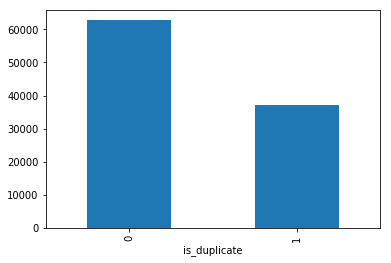

In [0]:
df.groupby("is_duplicate")['id'].count().plot.bar()

In [0]:
print('~> Total number of question pairs for training:\n   {}'.format(len(df)))

~> Total number of question pairs for training:
   100000


In [0]:
print('~> Question pairs are not Similar (is_duplicate = 0):\n   {}%'.format(100 - round(df['is_duplicate'].mean()*100, 2)))
print('\n~> Question pairs are Similar (is_duplicate = 1):\n   {}%'.format(round(df['is_duplicate'].mean()*100, 2)))

~> Question pairs are not Similar (is_duplicate = 0):
   62.75%

~> Question pairs are Similar (is_duplicate = 1):
   37.25%


<h3> 3.2.2 Number of unique questions </h3>

In [0]:
qids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
unique_qs = len(np.unique(qids))
qs_morethan_onetime = np.sum(qids.value_counts() > 1)
qs_morethan_onetime

19446

In [0]:
qids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
unique_qs = len(np.unique(qids))
qs_morethan_onetime = np.sum(qids.value_counts() > 1)
print ('Total number of  Unique Questions are: {}\n'.format(unique_qs))
#print len(np.unique(qids))

print ('Number of unique questions that appear more than one time: {} ({}%)\n'.format(qs_morethan_onetime,qs_morethan_onetime/unique_qs*100))

print ('Max number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

q_vals=qids.value_counts()

q_vals=q_vals.values

Total number of  Unique Questions are: 165931

Number of unique questions that appear more than one time: 19446 (11.719329118730075%)

Max number of times a single question is repeated: 32



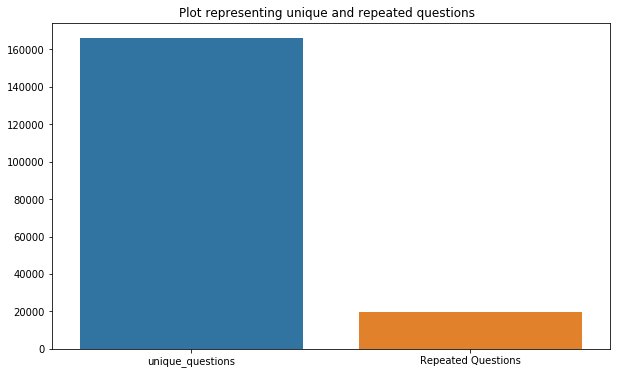

In [0]:

x = ["unique_questions" , "Repeated Questions"]
y =  [unique_qs , qs_morethan_onetime]

plt.figure(figsize=(10, 6))
plt.title ("Plot representing unique and repeated questions  ")
sns.barplot(x,y)
plt.show()

<h3>3.2.3 Checking for Duplicates </h3>

In [0]:
#checking whether there are any repeated pair of questions

pair_duplicates = df[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()

print ("Number of duplicate questions",(pair_duplicates).shape[0] - df.shape[0])

Number of duplicate questions 0


<h3> 3.2.4 Number of occurrences of each question </h3>

Maximum number of times a single question is repeated: 32



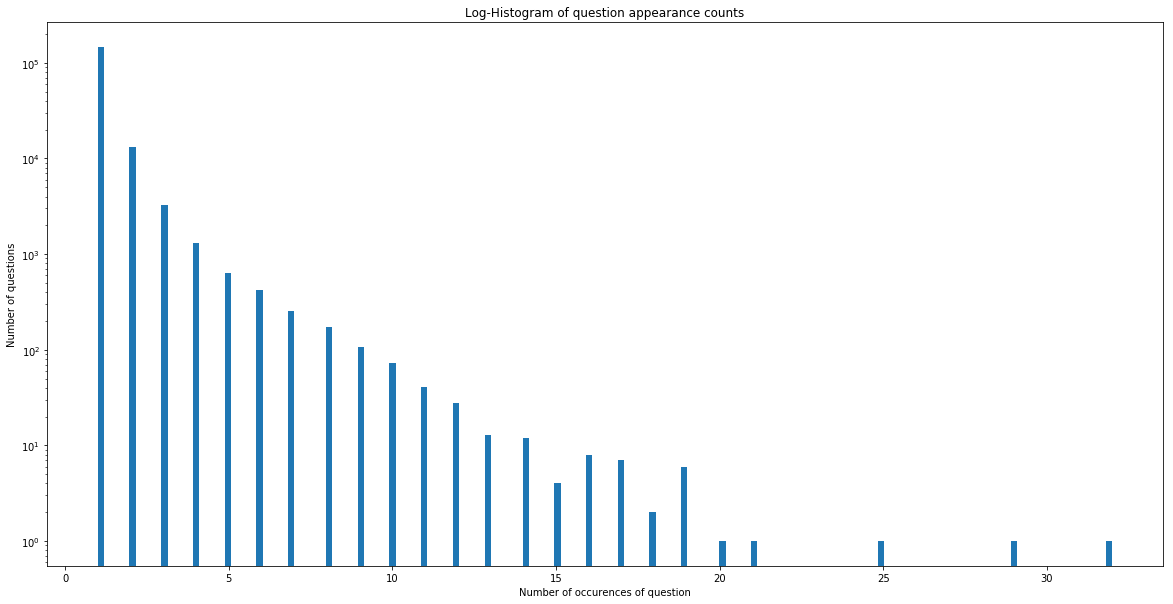

In [0]:
plt.figure(figsize=(20, 10))

plt.hist(qids.value_counts(), bins=160)

plt.yscale('log', nonposy='clip')

plt.title('Log-Histogram of question appearance counts')

plt.xlabel('Number of occurences of question')

plt.ylabel('Number of questions')

print ('Maximum number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

<h3> 3.2.5 Checking for NULL values </h3>

In [0]:
#Checking whether there are any rows with null values
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


- There are no rows with null values

In [0]:
"""# Filling the null values with ' '
df = df.fillna('')
nan_rows = df[df.isnull().any(1)]
print (nan_rows)"""

"# Filling the null values with ' '\ndf = df.fillna('')\nnan_rows = df[df.isnull().any(1)]\nprint (nan_rows)"

<h2>3.3 Basic Feature Extraction (before cleaning) </h2>

Let us now construct a few features like:
 - ____freq_qid1____ = Frequency of qid1's
 - ____freq_qid2____ = Frequency of qid2's 
 - ____q1len____ = Length of q1
 - ____q2len____ = Length of q2
 - ____q1_n_words____ = Number of words in Question 1
 - ____q2_n_words____ = Number of words in Question 2
 - ____word_Common____ = (Number of common unique words in Question 1 and Question 2)
 - ____word_Total____ =(Total num of words in Question 1 + Total num of words in Question 2)
 - ____word_share____ = (word_common)/(word_Total)
 - ____freq_q1+freq_q2____ = sum total of frequency of qid1 and qid2 
 - ____freq_q1-freq_q2____ = absolute difference of frequency of qid1 and qid2 

In [0]:
if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    df = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count') 
    df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count')
    df['q1len'] = df['question1'].str.len() 
    df['q2len'] = df['question2'].str.len()
    df['q1_n_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
    df['q2_n_words'] = df['question2'].apply(lambda row: len(row.split(" ")))

    def normalized_word_Common(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)
    df['word_Common'] = df.apply(normalized_word_Common, axis=1)

    def normalized_word_Total(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * (len(w1) + len(w2))
    df['word_Total'] = df.apply(normalized_word_Total, axis=1)

    def normalized_word_share(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
    df['word_share'] = df.apply(normalized_word_share, axis=1)

    df['freq_q1+q2'] = df['freq_qid1']+df['freq_qid2']
    df['freq_q1-q2'] = abs(df['freq_qid1']-df['freq_qid2'])

    df.to_csv("df_fe_without_preprocessing_train.csv", index=False)

df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,1,1,51,88,8,13,4.0,20.0,0.200000,2,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,1,1,76,39,13,7,2.0,20.0,0.100000,2,0


<h3> 3.3.1 Analysis of some of the extracted features </h3>

- Here are some questions have only one single words.

In [0]:
print ("Minimum length of the questions in question1 : " , min(df['q1_n_words']))

print ("Minimum length of the questions in question2 : " , min(df['q2_n_words']))

print ("Number of Questions with minimum length [question1] :", df[df['q1_n_words']== 1].shape[0])
print ("Number of Questions with minimum length [question2] :", df[df['q2_n_words']== 1].shape[0])

Minimum length of the questions in question1 :  1
Minimum length of the questions in question2 :  1
Number of Questions with minimum length [question1] : 15
Number of Questions with minimum length [question2] : 5


<h4> 3.3.1.1 Feature: word_share </h4>

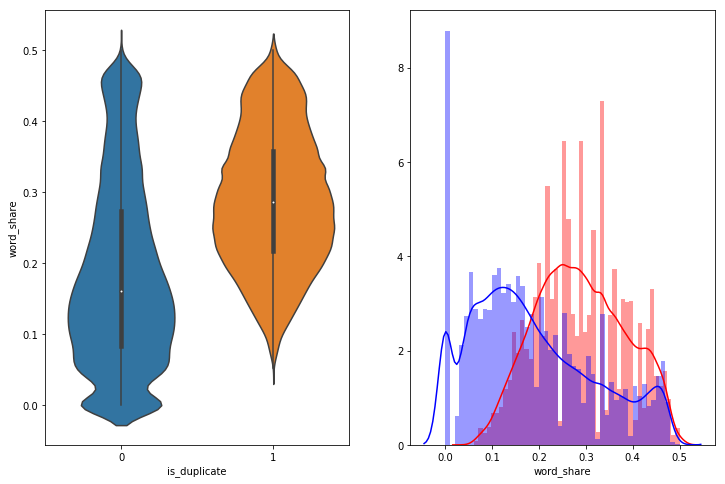

In [0]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_share', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_share'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_share'][0:] , label = "0" , color = 'blue' )
plt.show()

- The distributions for normalized word_share have some overlap on the far right-hand side, i.e., there are quite a lot of questions with high word similarity
- The average word share and Common no. of words of qid1 and qid2 is more when they are duplicate(Similar)

<h4> 3.3.1.2 Feature: word_Common </h4>

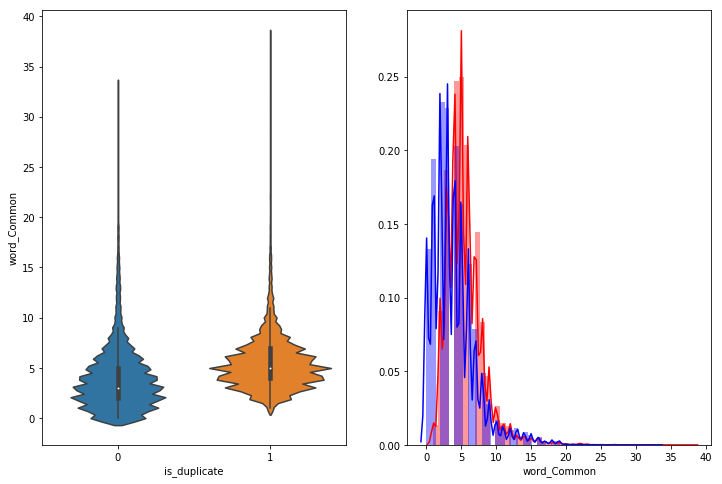

In [0]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_Common', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_Common'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_Common'][0:] , label = "0" , color = 'blue' )
plt.show()

<p> The distributions of the word_Common feature in similar and non-similar questions are highly overlapping </p>

<h2> 3.4 Preprocessing of Text </h2>

- Preprocessing:
    - Removing html tags 
    - Removing Punctuations
    - Performing stemming
    - Removing Stopwords
    - Expanding contractions etc.

In [0]:
! pip install fuzzywuzzy

In [0]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

import re
from nltk.corpus import stopwords
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
# This package is used for finding longest common subsequence between two strings
# you can write your own dp code for this
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from fuzzywuzzy import fuzz
from sklearn.manifold import TSNE
# Import the Required lib packages for WORD-Cloud generation
# https://stackoverflow.com/questions/45625434/how-to-install-wordcloud-in-python3-6
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
# To get the results in 4 decemal points
SAFE_DIV = 0.0001 

STOP_WORDS = stopwords.words("english")


def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    
    return x
    

- Function to Compute and get the features : With 2 parameters of Question 1 and Question 2

<h2> 3.5 Advanced Feature Extraction (NLP and Fuzzy Features) </h2>

Definition:
- __Token__: You get a token by splitting sentence a space
- __Stop_Word__ : stop words as per NLTK.
- __Word__ : A token that is not a stop_word


Features:
- __cwc_min__ :  Ratio of common_word_count to min lenghth of word count of Q1 and Q2 <br>cwc_min = common_word_count / (min(len(q1_words), len(q2_words))
<br>
<br>
- __cwc_max__ :  Ratio of common_word_count to max lenghth of word count of Q1 and Q2 <br>cwc_max = common_word_count / (max(len(q1_words), len(q2_words))
<br>
<br>
- __csc_min__ :  Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2 <br> csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))
<br>
<br>
- __csc_max__ :  Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2<br>csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))
<br>
<br>
- __ctc_min__ :  Ratio of common_token_count to min lenghth of token count of Q1 and Q2<br>ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))
<br>
<br>

- __ctc_max__ :  Ratio of common_token_count to max lenghth of token count of Q1 and Q2<br>ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))
<br>
<br>
        
- __last_word_eq__ :  Check if First word of both questions is equal or not<br>last_word_eq = int(q1_tokens[-1] == q2_tokens[-1])
<br>
<br>

- __first_word_eq__ :  Check if First word of both questions is equal or not<br>first_word_eq = int(q1_tokens[0] == q2_tokens[0])
<br>
<br>
        
- __abs_len_diff__ :  Abs. length difference<br>abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))
<br>
<br>

- __mean_len__ :  Average Token Length of both Questions<br>mean_len = (len(q1_tokens) + len(q2_tokens))/2
<br>
<br>


- __fuzz_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>

- __fuzz_partial_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>


- __token_sort_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>


- __token_set_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>





- __longest_substr_ratio__ :  Ratio of length longest common substring to min lenghth of token count of Q1 and Q2<br>longest_substr_ratio = len(longest common substring) / (min(len(q1_tokens), len(q2_tokens))


In [0]:
def get_token_features(q1, q2):
    token_features = [0.0]*10
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    token_features[8] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    token_features[9] = (len(q1_tokens) + len(q2_tokens))/2
    return token_features

# get the Longest Common sub string

def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

def extract_features(df):
    # preprocessing each question
    df["question1"] = df["question1"].fillna("").apply(preprocess)
    df["question2"] = df["question2"].fillna("").apply(preprocess)

    print("token features...")
    
    # Merging Features with dataset
    
    token_features = df.apply(lambda x: get_token_features(x["question1"], x["question2"]), axis=1)
    
    df["cwc_min"]       = list(map(lambda x: x[0], token_features))
    df["cwc_max"]       = list(map(lambda x: x[1], token_features))
    df["csc_min"]       = list(map(lambda x: x[2], token_features))
    df["csc_max"]       = list(map(lambda x: x[3], token_features))
    df["ctc_min"]       = list(map(lambda x: x[4], token_features))
    df["ctc_max"]       = list(map(lambda x: x[5], token_features))
    df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
    df["first_word_eq"] = list(map(lambda x: x[7], token_features))
    df["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
    df["mean_len"]      = list(map(lambda x: x[9], token_features))
   
    #Computing Fuzzy Features and Merging with Dataset
    
    # do read this blog: http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
    # https://stackoverflow.com/questions/31806695/when-to-use-which-fuzz-function-to-compare-2-strings
    # https://github.com/seatgeek/fuzzywuzzy
    print("fuzzy features..")

    df["token_set_ratio"]       = df.apply(lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)
    # The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and 
    # then joining them back into a string We then compare the transformed strings with a simple ratio().
    df["token_sort_ratio"]      = df.apply(lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
    df["fuzz_ratio"]            = df.apply(lambda x: fuzz.QRatio(x["question1"], x["question2"]), axis=1)
    df["fuzz_partial_ratio"]    = df.apply(lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)
    df["longest_substr_ratio"]  = df.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)
    return df

In [0]:
df=extract_features(df)

token features...
fuzzy features..


In [0]:
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,1,1,51,88,8,13,4.0,20.0,0.200000,2,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154


<h3>3.5.1 Analysis of extracted features </h3>

<h4> 3.5.1.1 Plotting Word clouds</h4>

- Creating Word Cloud of Duplicates and Non-Duplicates Question pairs
- We can observe the most frequent occuring words

In [0]:
df_duplicate = df[df['is_duplicate'] == 1]
dfp_nonduplicate = df[df['is_duplicate'] == 0]

# Converting 2d array of q1 and q2 and flatten the array: like {{1,2},{3,4}} to {1,2,3,4}
p = np.dstack([df_duplicate["question1"], df_duplicate["question2"]]).flatten()
n = np.dstack([dfp_nonduplicate["question1"], dfp_nonduplicate["question2"]]).flatten()

print ("Number of data points in class 1 (duplicate pairs) :",len(p))
print ("Number of data points in class 0 (non duplicate pairs) :",len(n))

#Saving the np array into a text file
np.savetxt('train_p.txt', p, delimiter=' ', fmt='%s')
np.savetxt('train_n.txt', n, delimiter=' ', fmt='%s')

Number of data points in class 1 (duplicate pairs) : 74508
Number of data points in class 0 (non duplicate pairs) : 125492


In [0]:
p[:5]

array(['astrology  i am a capricorn sun cap moon and cap rising   what does that say about me ',
       'i am a triple capricorn  sun  moon and ascendant in capricorn  what does this say about me ',
       'how can i be a good geologist ',
       'what should i do to be a great geologist ',
       'how do i read and find my youtube comments '], dtype=object)

In [0]:
# reading the text files and removing the Stop Words:
d = path.dirname('.')

textp_w = open(path.join(d, 'train_p.txt')).read()
textn_w = open(path.join(d, 'train_n.txt')).read()
stopwords = set(STOPWORDS)
stopwords.add("said")
stopwords.add("br")
stopwords.add(" ")
stopwords.remove("not")

stopwords.remove("no")
#stopwords.remove("good")
#stopwords.remove("love")
stopwords.remove("like")
#stopwords.remove("best")
#stopwords.remove("!")
print ("Total number of words in duplicate pair questions :",len(textp_w))
print ("Total number of words in non duplicate pair questions :",len(textn_w))

Total number of words in duplicate pair questions : 4021664
Total number of words in non duplicate pair questions : 8154691


__ Word Clouds generated from  duplicate pair question's text __

Word Cloud for Duplicate Question pairs


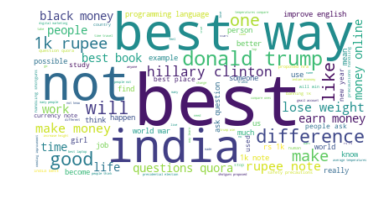

In [0]:
wc = WordCloud(background_color="white", max_words=len(textp_w), stopwords=stopwords)
wc.generate(textp_w)
print ("Word Cloud for Duplicate Question pairs")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

__ Word Clouds generated from non duplicate pair question's text __

Word Cloud for non-Duplicate Question pairs:


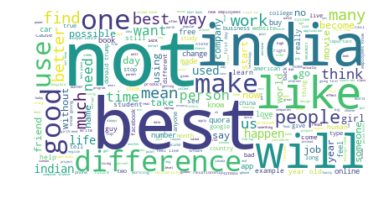

In [0]:
wc = WordCloud(background_color="white", max_words=len(textn_w),stopwords=stopwords)
# generate word cloud
wc.generate(textn_w)
print ("Word Cloud for non-Duplicate Question pairs:")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<h4> 3.5.1.2 Pair plot of features ['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'] </h4>

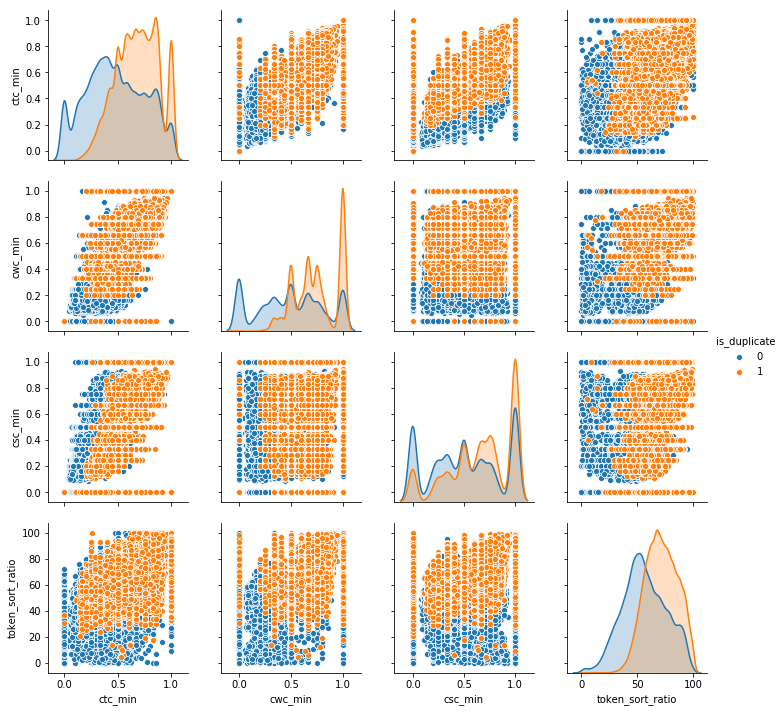

In [0]:
n = df.shape[0]
sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio', 'is_duplicate']][0:n], hue='is_duplicate', vars=['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'])
plt.show()

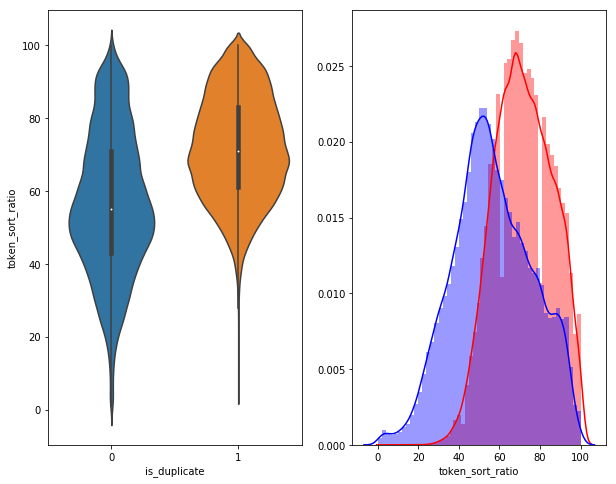

In [0]:
# Distribution of the token_sort_ratio
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'token_sort_ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['token_sort_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['token_sort_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

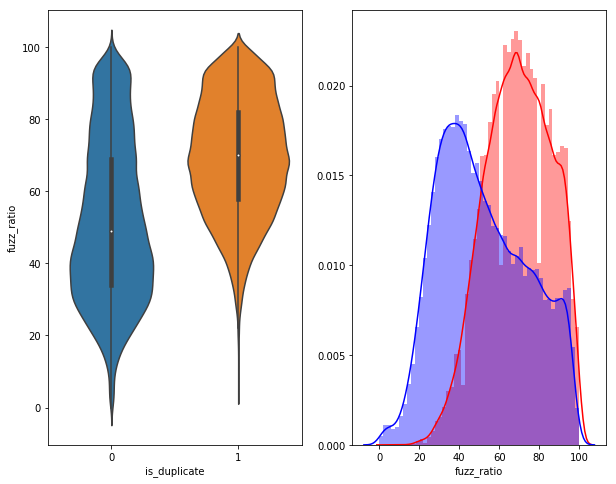

In [0]:
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'fuzz_ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['fuzz_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['fuzz_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

<h3>3.5.2 Visualization </h3>

In [0]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

dfp_subsampled = df[0:5000]
X = MinMaxScaler().fit_transform(dfp_subsampled[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = dfp_subsampled['is_duplicate'].values

In [0]:
tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.014s...
[t-SNE] Computed neighbors for 5000 samples in 0.383s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.130446
[t-SNE] Computed conditional probabilities in 0.309s
[t-SNE] Iteration 50: error = 81.2911148, gradient norm = 0.0457501 (50 iterations in 3.031s)
[t-SNE] Iteration 100: error = 70.6044159, gradient norm = 0.0086692 (50 iterations in 2.126s)
[t-SNE] Iteration 150: error = 68.9124908, gradient norm = 0.0056016 (50 iterations in 2.034s)
[t-SNE] Iteration 200: error = 68.1010742, gradient norm = 0.0047585 (50 iterations in 2.104s)
[t-SNE] Iteration 250: error = 67.5907974, gradient norm = 0.0033576

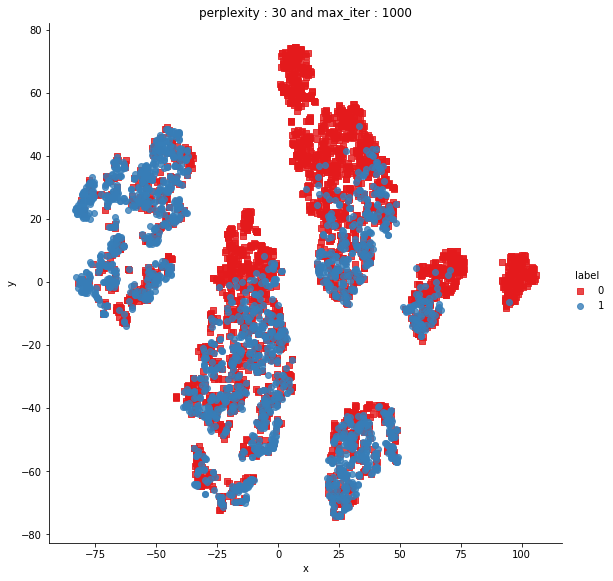

In [0]:
df_tsne = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=df_tsne, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])
plt.title("perplexity : {} and max_iter : {}".format(30, 1000))
plt.show()

In [0]:
from sklearn.manifold import TSNE
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.013s...
[t-SNE] Computed neighbors for 5000 samples in 0.377s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.130446
[t-SNE] Computed conditional probabilities in 0.302s
[t-SNE] Iteration 50: error = 80.5316772, gradient norm = 0.0296611 (50 iterations in 13.600s)
[t-SNE] Iteration 100: error = 69.3823166, gradient norm = 0.0032796 (50 iterations in 6.428s)
[t-SNE] Iteration 150: error = 67.9726028, gradient norm = 0.0016793 (50 iterations in 5.808s)
[t-SNE] Iteration 200: error = 67.4176178, gradient norm = 0.0010922 (50 iterations in 5.849s)
[t-SNE] Iteration 250: error = 67.1033630, gradient norm = 0.000883

In [0]:
trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')
plt.show()

<h2> 3.6 Featurizing text data with tfidf weighted word-vectors </h2>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings("ignore")
import sys
import os 
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split

# exctract word2vec vectors
# https://github.com/explosion/spaCy/issues/1721
# http://landinghub.visualstudio.com/visual-cpp-build-tools
import spacy

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
id                      100000 non-null int64
qid1                    100000 non-null int64
qid2                    100000 non-null int64
question1               100000 non-null object
question2               100000 non-null object
is_duplicate            100000 non-null int64
freq_qid1               100000 non-null int64
freq_qid2               100000 non-null int64
q1len                   100000 non-null int64
q2len                   100000 non-null int64
q1_n_words              100000 non-null int64
q2_n_words              100000 non-null int64
word_Common             100000 non-null float64
word_Total              100000 non-null float64
word_share              100000 non-null float64
freq_q1+q2              100000 non-null int64
freq_q1-q2              100000 non-null int64
cwc_min                 100000 non-null float64
cwc_max                 100000 non-null float64
csc_

In [0]:
questions=df[['question1','question2']]
questions=questions.apply(lambda x: " ".join(x), axis=1)

In [0]:

# concateneated text i.e q1 & q2
print(questions[0])

len(questions)


what is the step by step guide to invest in share market in india  what is the step by step guide to invest in share market 


100000

In [0]:


x_train,x_test,y_train,y_test=train_test_split(questions,df['is_duplicate'])

In [0]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


tfidf = TfidfVectorizer(lowercase=False, )
tfidf.fit(x_train,y_train)

# dict key:word and value:tf-idf score
word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

In [0]:
# en_vectors_web_lg, which includes over 1 million unique vectors.
nlp = spacy.load('en_core_web_sm')

vecs1 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm(list(df['question1'])):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    #mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    mean_vec1 = np.zeros(96)
    
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1/96
    vecs1.append(mean_vec1)
#df['q1_feats_m'] = list(vecs1)



"""
change code to make sure, tfidf w2v of each text gets appended into the dataframe.
"""

100%|██████████| 100000/100000 [17:28<00:00, 95.41it/s]


'\nchange code to make sure, tfidf w2v of each text gets appended into the dataframe.\n'

In [0]:
len(vecs1[0])

96

In [0]:
vecs2 = []
for qu2 in tqdm(list(df['question2'])):
    doc2 = nlp(qu2) 
    mean_vec2 = np.zeros(96)
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word2)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2/96
    vecs2.append(mean_vec2)
#df['q2_feats_m'] = list(vecs2)

100%|██████████| 100000/100000 [17:08<00:00, 97.23it/s]


In [0]:
len(vecs2[0])

96

In [0]:
df1=pd.DataFrame(vecs1)
df2=pd.DataFrame(vecs2,columns=list(range(96,192)))
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 96 columns):
0     100000 non-null float64
1     100000 non-null float64
2     100000 non-null float64
3     100000 non-null float64
4     100000 non-null float64
5     100000 non-null float64
6     100000 non-null float64
7     100000 non-null float64
8     100000 non-null float64
9     100000 non-null float64
10    100000 non-null float64
11    100000 non-null float64
12    100000 non-null float64
13    100000 non-null float64
14    100000 non-null float64
15    100000 non-null float64
16    100000 non-null float64
17    100000 non-null float64
18    100000 non-null float64
19    100000 non-null float64
20    100000 non-null float64
21    100000 non-null float64
22    100000 non-null float64
23    100000 non-null float64
24    100000 non-null float64
25    100000 non-null float64
26    100000 non-null float64
27    100000 non-null float64
28    100000 non-null float64
29    100000 non-nul

In [0]:
# Concatenate df1 & df2

dfq=pd.concat([df1,df2],axis=1)
dfq.info()
#print(dfq.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 192 entries, 0 to 191
dtypes: float64(192)
memory usage: 146.5 MB


In [0]:
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,1,1,51,88,8,13,4.0,20.0,0.200000,2,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154


In [0]:
# lets drop columns -> 'question1', 'question2'
df_=df.drop(columns=['question1','question2'],axis=1)
# We are not using inplace=True here, cz we will be needing df(original) in TFIDF case.

In [0]:
df_.head()

,id,qid1,qid2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,3,4,0,1,1,51,88,8,13,4.0,20.0,0.200000,2,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154
2,2,5,6,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,63,63,43,47,0.166667
3,3,7,8,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,28,24,9,14,0.039216
4,4,9,10,0,1,1,76,39,13,7,2.0,20.0,0.100000,2,0,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,67,47,35,56,0.175000


In [0]:
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,1,1,51,88,8,13,4.0,20.0,0.200000,2,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154


In [0]:
# & finally concatenate the dfq (dataframe with tfidf_w2v tokenized text i.e tfidf_w2v tokenized question1 & question2) with df (original dataframe)
final_df=pd.concat([df_,dfq],axis=1)
print(final_df.info())
final_df.head(2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 222 entries, id to 191
dtypes: float64(206), int64(16)
memory usage: 169.4 MB
None


,id,qid1,qid2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,0,1,2,3,4,5,6,7,8,9,...,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191
0,0,1,2,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759,1.822596,-1.294726,-0.515485,-1.468230,-0.863013,0.052835,1.323701,0.428323,-0.610815,0.513196,...,0.668653,-0.104073,-0.231378,1.885485,-0.397756,-1.356036,1.581656,-0.495482,0.322220,0.372711,-0.679145,0.686613,-0.770131,1.593360,0.312095,-0.208612,0.648909,0.933419,1.154952,1.911097,-0.049046,0.761449,-1.245062,-0.794635,-0.303564,-0.762965,-1.558344,0.538818,-0.115818,-0.622650,0.330054,-0.978879,1.269895,0.361252,-0.061339,0.037412,-0.55418,-0.104981,-1.007441,0.60256
1,1,3,4,0,1,1,51,88,8,13,4.0,20.0,0.200000,2,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154,0.858045,-1.277571,-0.073049,-0.601005,-1.191995,-0.467571,0.172430,0.218868,-0.414184,0.695030,...,1.160635,-0.252123,-0.958513,1.027769,-1.759520,1.250444,1.744562,0.993005,-0.288067,1.171626,0.032817,-0.488136,-0.207664,0.373483,1.037343,-1.483352,-0.651350,2.093876,0.881034,-0.174946,-0.964704,-0.672238,-1.351780,-0.956838,-0.094937,-1.471366,-1.670419,1.266391,-0.712939,-0.714085,1.282036,-0.242993,1.086533,1.242890,0.106254,-0.337382,-0.75035,0.006136,-0.150564,0.94957


In [0]:
# creating a list with target variable i.e is_duplicate & also dropping it from the final_df DataFrame.

is_duplicate=list(final_df['is_duplicate'])
final_df.drop(columns=['is_duplicate'],axis=1,inplace=True)
print(final_df.info())
is_duplicate[:20]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 221 entries, id to 191
dtypes: float64(206), int64(15)
memory usage: 168.6 MB
None


[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0]

<h2> 3.7 Featurizing text data with TFIDF vectorizer </h2>

In [0]:
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,1,1,51,88,8,13,4.0,20.0,0.200000,2,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154


In [0]:

questions=df[['question1','question2']]
questions=questions.apply(lambda x: " ".join(x), axis=1)


In [0]:
# concateneated text i.e q1 & q2
print(questions[0])
len(questions)



what is the step by step guide to invest in share market in india  what is the step by step guide to invest in share market 


100000

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

x_train_tf,x_test_tf,y_train_tf,y_test_tf=train_test_split(questions,df['is_duplicate'])


tfidf = TfidfVectorizer(lowercase=False,max_features=7000) # restricted to 7000 fearures...as TFIDF vectorizer generates very large dimensions/features
tfidf.fit(x_train_tf,y_train_tf)


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=False, max_df=1.0, max_features=7000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [0]:
tfidf_train=tfidf.transform(x_train_tf)
tfidf_test=tfidf.transform(x_test_tf)

In [0]:
tfidf_train.shape

(75000, 7000)

<h1>4. Machine Learning Models </h1>

<h2> 4.1 Converting strings to numerics </h2>

In [0]:
# after we read from sql table each entry was read it as a string
# we convert all the features into numaric before we apply any model
cols = list(final_df.columns)
for i in cols:
    final_df[i] = final_df[i].apply(pd.to_numeric)
    print(i)

id
qid1
qid2
freq_qid1
freq_qid2
q1len
q2len
q1_n_words
q2_n_words
word_Common
word_Total
word_share
freq_q1+q2
freq_q1-q2
cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
token_set_ratio
token_sort_ratio
fuzz_ratio
fuzz_partial_ratio
longest_substr_ratio
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191


In [0]:
"""# https://stackoverflow.com/questions/7368789/convert-all-strings-in-a-list-to-int
y_true = list(map(int, y_true.values))"""

'# https://stackoverflow.com/questions/7368789/convert-all-strings-in-a-list-to-int\ny_true = list(map(int, y_true.values))'

<h2> 4.2 Random train test split( 70:30) </h2>


In [0]:
x_train,x_test,y_train,y_test=train_test_split(final_df,is_duplicate)

# This is for TFIDF_W2V only

In [0]:


from collections import Counter

print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[0])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6275733333333333 Class 1:  0.3724266666666667
---------- Distribution of output variable in train data ----------
Class 0:  0.62712 Class 1:  0.37288


In [0]:
"""
1. This is for TFIDF vectorized data
2. To execute this cell do not run/execute above cell of train_test_split which is only for TFIDF_W2V
3. To be noted, for TFIDF we have already executed a cell (train_test_split) for splitting data 

"""

from collections import Counter

print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train_tf)
train_len = len(y_train_tf)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test_tf)
test_len = len(y_test_tf)
print("Class 0: ",int(test_distr[0])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6275866666666666 Class 1:  0.3724133333333333
---------- Distribution of output variable in train data ----------
Class 0:  0.62708 Class 1:  0.37292


In [0]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

<h2> 4.3 Building a random model (Finding worst-case log-loss) </h2>

In [0]:
"""predicted_y[:10]
rand_probs
(rand_probs/sum(sum(rand_probs)))[0]
"""

'predicted_y[:10]\nrand_probs\n(rand_probs/sum(sum(rand_probs)))[0]\n'

Log loss on Test Data using Random Model 0.8966860098073233


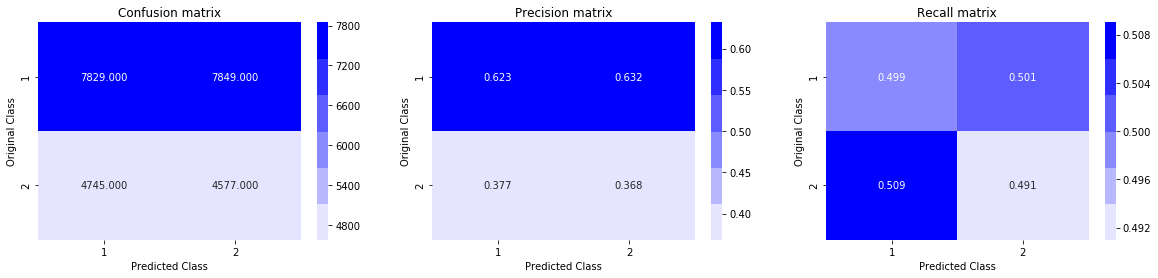

In [0]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data

from sklearn.metrics import log_loss,confusion_matrix

predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)



<h2> 4.4 Logistic Regression with hyperparameter tuning </h2>

**SET 1:-**


 14%|█▍        | 1/7 [01:59<11:58, 119.70s/it]

For values of alpha =  1e-05 The log loss is: 0.6604711125159786



 29%|██▊       | 2/7 [03:44<09:35, 115.20s/it]

For values of alpha =  0.0001 The log loss is: 0.6604711125159786



 43%|████▎     | 3/7 [05:40<07:41, 115.46s/it]

For values of alpha =  0.001 The log loss is: 0.6604711125159786



 57%|█████▋    | 4/7 [07:29<05:40, 113.62s/it]

For values of alpha =  0.01 The log loss is: 0.6604711125159786



 71%|███████▏  | 5/7 [09:39<03:56, 118.46s/it]

For values of alpha =  0.1 The log loss is: 0.5910477845908736



 86%|████████▌ | 6/7 [12:01<02:05, 125.38s/it]

For values of alpha =  1 The log loss is: 0.6194405257392928



100%|██████████| 7/7 [14:38<00:00, 135.11s/it]


For values of alpha =  10 The log loss is: 0.5877256943936903


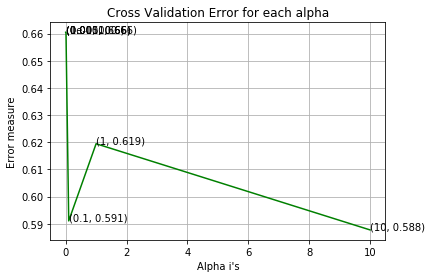

For values of best alpha =  10 The train log loss is: 0.5855472308321421
For values of best alpha =  10 The test log loss is: 0.5877256943936903
Total number of data points : 25000


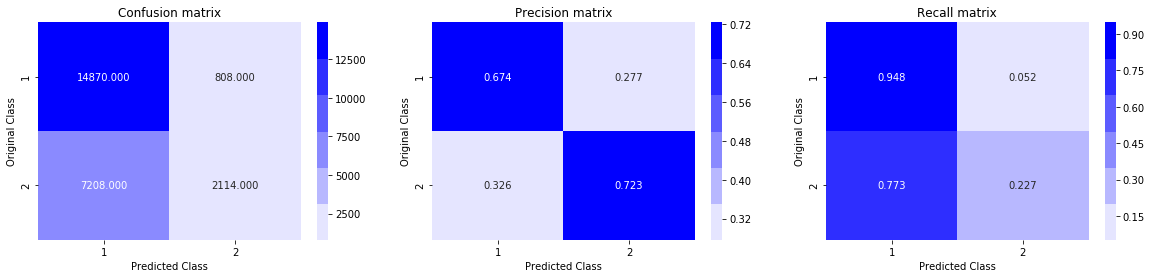

In [0]:

from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]

for i in tqdm(alpha):
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(x_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(x_train, y_train)
    predict_y = sig_clf.predict_proba(x_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(x_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train, y_train)

predict_y = sig_clf.predict_proba(x_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(x_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

**SET 2:-**


 14%|█▍        | 1/7 [00:01<00:08,  1.49s/it]

For values of alpha =  1e-05 The log loss is: 0.5191741287382331



 29%|██▊       | 2/7 [00:02<00:06,  1.37s/it]

For values of alpha =  0.0001 The log loss is: 0.5372723430014978



 43%|████▎     | 3/7 [00:03<00:05,  1.25s/it]

For values of alpha =  0.001 The log loss is: 0.5671591540291634



 57%|█████▋    | 4/7 [00:04<00:03,  1.22s/it]

For values of alpha =  0.01 The log loss is: 0.5887981634233258



 71%|███████▏  | 5/7 [00:05<00:02,  1.15s/it]

For values of alpha =  0.1 The log loss is: 0.6285369782291991



 86%|████████▌ | 6/7 [00:07<00:01,  1.24s/it]

For values of alpha =  1 The log loss is: 0.6371981426966432



100%|██████████| 7/7 [00:08<00:00,  1.14s/it]


For values of alpha =  10 The log loss is: 0.6382584717433262


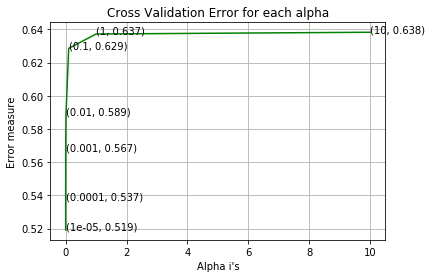

For values of best alpha =  1e-05 The train log loss is: 0.4722202882282289
For values of best alpha =  1e-05 The test log loss is: 0.5191741287382331
Total number of data points : 25000


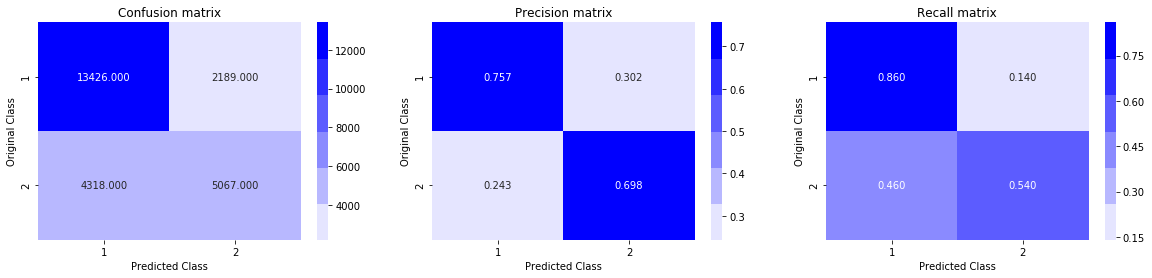

In [0]:

from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]

for i in tqdm(alpha):
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(tfidf_train,y_train_tf)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(tfidf_train, y_train_tf)
    predict_y = sig_clf.predict_proba(tfidf_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test_tf, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(tfidf_train, y_train_tf)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(tfidf_train, y_train_tf)

predict_y = sig_clf.predict_proba(tfidf_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_tf, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(tfidf_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_tf, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test_tf, predicted_y)

<h2> 4.5 Linear SVM with hyperparameter tuning </h2>

**SET 1:-**


 14%|█▍        | 1/7 [03:08<18:49, 188.18s/it]

For values of alpha =  1e-05 The log loss is: 0.6604711125159786



 29%|██▊       | 2/7 [06:13<15:36, 187.27s/it]

For values of alpha =  0.0001 The log loss is: 0.6604711125159786



 43%|████▎     | 3/7 [09:03<12:08, 182.01s/it]

For values of alpha =  0.001 The log loss is: 0.6604711125159786



 57%|█████▋    | 4/7 [12:14<09:14, 184.92s/it]

For values of alpha =  0.01 The log loss is: 0.6604711125159786



 71%|███████▏  | 5/7 [16:51<07:05, 212.53s/it]

For values of alpha =  0.1 The log loss is: 0.6604711125159786



 86%|████████▌ | 6/7 [23:24<04:26, 266.67s/it]

For values of alpha =  1 The log loss is: 0.6108396042201697



100%|██████████| 7/7 [32:35<00:00, 351.77s/it]


For values of alpha =  10 The log loss is: 0.6338480350608996


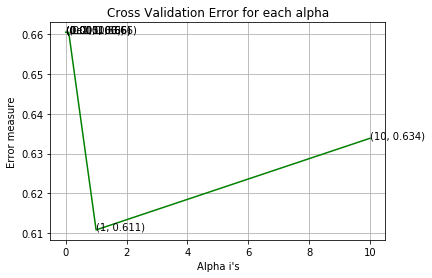

For values of best alpha =  1 The train log loss is: 0.6094871062732229
For values of best alpha =  1 The test log loss is: 0.6108396042201697
Total number of data points : 25000


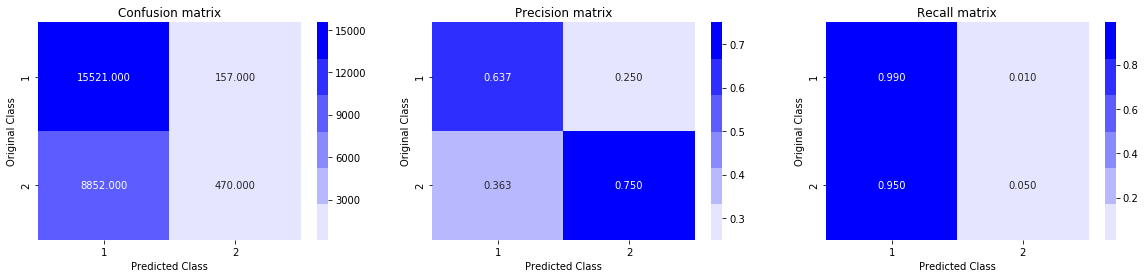

In [0]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in tqdm(alpha):
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(x_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(x_train, y_train)
    predict_y = sig_clf.predict_proba(x_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(x_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train, y_train)

predict_y = sig_clf.predict_proba(x_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(x_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

**SET 2:-**


 14%|█▍        | 1/7 [00:02<00:15,  2.65s/it]

For values of alpha =  1e-05 The log loss is: 0.5270685817737549



 29%|██▊       | 2/7 [00:03<00:11,  2.22s/it]

For values of alpha =  0.0001 The log loss is: 0.5751200524606399



 43%|████▎     | 3/7 [00:04<00:07,  1.87s/it]

For values of alpha =  0.001 The log loss is: 0.6446663853775495



 57%|█████▋    | 4/7 [00:05<00:04,  1.55s/it]

For values of alpha =  0.01 The log loss is: 0.661798320753521



 71%|███████▏  | 5/7 [00:06<00:02,  1.45s/it]

For values of alpha =  0.1 The log loss is: 0.6617983207535251



 86%|████████▌ | 6/7 [00:07<00:01,  1.24s/it]

For values of alpha =  1 The log loss is: 0.6617983207535253



100%|██████████| 7/7 [00:08<00:00,  1.09s/it]


For values of alpha =  10 The log loss is: 0.6617983207535253


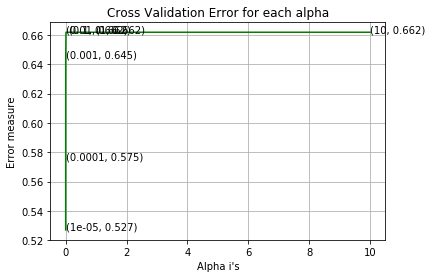

For values of best alpha =  1e-05 The train log loss is: 0.47336889312491226
For values of best alpha =  1e-05 The test log loss is: 0.5270685817737549
Total number of data points : 25000


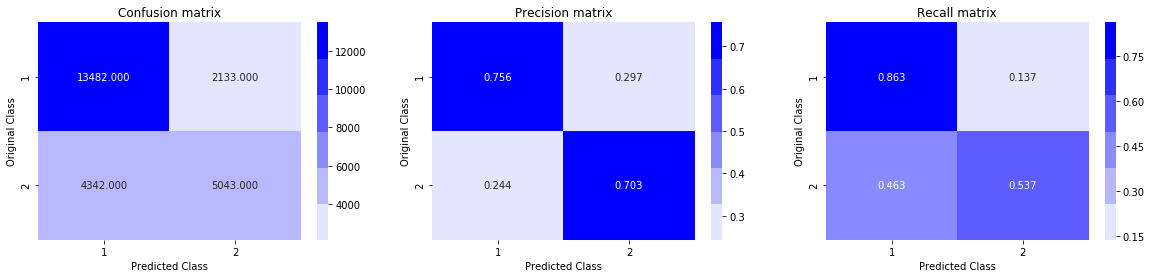

In [0]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in tqdm(alpha):
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(tfidf_train, y_train_tf)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(tfidf_train, y_train_tf)
    predict_y = sig_clf.predict_proba(tfidf_test)
    log_error_array.append(log_loss(y_test_tf, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test_tf, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(tfidf_train, y_train_tf)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(tfidf_train, y_train_tf)

predict_y = sig_clf.predict_proba(tfidf_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_tf, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(tfidf_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_tf, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test_tf, predicted_y)

<h2> 4.6 XGBoost </h2>

**SET 1:-**

In [0]:
param={'n_estimators':[1,5,10,20],'max_depth':[1,5,10,20,50,100],'learning_rate':[10**i for i in range(-3,2)],'eval_metric':['logloss']}

In [0]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
model=xgb.XGBClassifier()
gd=GridSearchCV(model,param_grid=param,cv=3,return_train_score=True)

gd.fit(x_train[:5000],y_train[:5000])


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'eval_metric': ['logloss'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'max_depth': [1, 5, 

In [0]:
gd.best_params_

{'eval_metric': 'logloss',
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 20}

In [0]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 5
params['n_estimators']=20
params['learning_rate']=0.1

d_train = xgb.DMatrix(x_train, label=y_train)
d_test = xgb.DMatrix(x_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(x_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

"""
1. watchlist is for a model to watch out logloss for...in watchlist we mention train & validation data which model uses to evaluate itself
2. xgb.train() takes parameters -> no. of iterations i.e rounds which is 400 in this case, early stopping 20 that means
if validation log loss doesnt improve even after 20 iterations then stop at that instant only rather than iterating for complete 400 iterations & 
verbose eval tells model , to evaluate logloss after every 10 iterations as we can see below.

"""

[0]	train-logloss:0.654828	valid-logloss:0.654886
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.476589	valid-logloss:0.478561
[20]	train-logloss:0.42406	valid-logloss:0.427988
[30]	train-logloss:0.403235	valid-logloss:0.409069
[40]	train-logloss:0.391516	valid-logloss:0.39991
[50]	train-logloss:0.3833	valid-logloss:0.393943
[60]	train-logloss:0.375565	valid-logloss:0.38896
[70]	train-logloss:0.368797	valid-logloss:0.385229
[80]	train-logloss:0.362719	valid-logloss:0.382276
[90]	train-logloss:0.357146	valid-logloss:0.379755
[100]	train-logloss:0.352743	valid-logloss:0.37807
[110]	train-logloss:0.348103	valid-logloss:0.376436
[120]	train-logloss:0.343622	valid-logloss:0.374674
[130]	train-logloss:0.339955	valid-logloss:0.373575
[140]	train-logloss:0.336718	valid-logloss:0.372663
[150]	train-logloss:0.333291	valid-logloss:0.371798
[160]	train-logloss:0.330219	valid

* Note that though best logloss for validation data is 0.36208 but corresponding train log loss has significant difference with it which may indicate that model might be overfitting.
* While we are geting almost same log loss for validation data with less difference between log loss of train & validation data...and that combination we can get from above log loss values.
* So the best combination is found at **180th iteration** to be **train log loss = 0.323 & validation log loss = 0.369**

Total number of data points : 25000


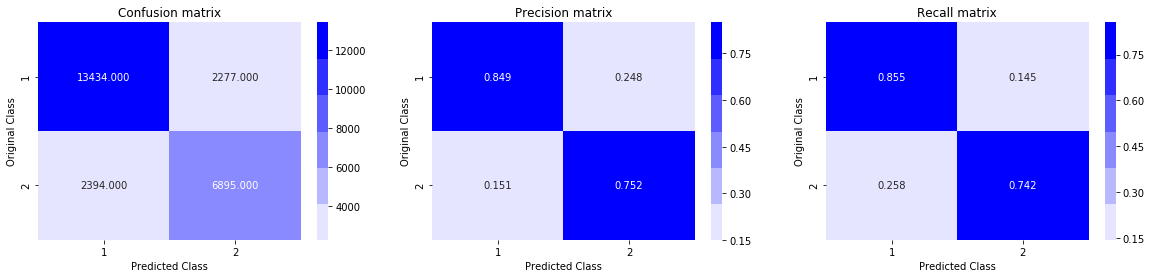

In [0]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

**SET 2:-**

In [0]:
param={'n_estimators':[1,5,10,20],'max_depth':[1,5,10,20,50,100],'learning_rate':[10**i for i in range(-3,2)],'eval_metric':['logloss']}

from sklearn.model_selection import GridSearchCV
import xgboost as xgb
model=xgb.XGBClassifier()
gd=GridSearchCV(model,param_grid=param,cv=3,return_train_score=True)

gd.fit(tfidf_train[:5000],y_train_tf[:5000])


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'eval_metric': ['logloss'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'max_depth': [1, 5, 

In [0]:
gd.best_params_

{'eval_metric': 'logloss',
 'learning_rate': 0.1,
 'max_depth': 50,
 'n_estimators': 20}

In [0]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 50
params['n_estimators']=20
params['learning_rate']=0.1

d_train = xgb.DMatrix(tfidf_train, label=y_train_tf)
d_test = xgb.DMatrix(tfidf_test, label=y_test_tf)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(tfidf_train,y_train_tf)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test_tf, predict_y, labels=clf.classes_, eps=1e-15))

"""
1. watchlist is for a model to watch out logloss for...in watchlist we mention train & validation data which model uses to evaluate itself
2. xgb.train() takes parameters -> no. of iterations i.e rounds which is 400 in this case, early stopping 20 that means
if validation log loss doesnt improve even after 20 iterations then stop at that instant only rather than iterating for complete 400 iterations & 
verbose eval tells model , to evaluate logloss after every 10 iterations as we can see below.

"""

[0]	train-logloss:0.64544	valid-logloss:0.666814
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.386287	valid-logloss:0.555233
[20]	train-logloss:0.286194	valid-logloss:0.523244
[30]	train-logloss:0.244206	valid-logloss:0.510462
[40]	train-logloss:0.221449	valid-logloss:0.503914
[50]	train-logloss:0.207197	valid-logloss:0.499294
[60]	train-logloss:0.196266	valid-logloss:0.496062
[70]	train-logloss:0.188472	valid-logloss:0.493106
[80]	train-logloss:0.180535	valid-logloss:0.490791
[90]	train-logloss:0.175316	valid-logloss:0.489228
[100]	train-logloss:0.169992	valid-logloss:0.487812
[110]	train-logloss:0.16555	valid-logloss:0.486446
[120]	train-logloss:0.161494	valid-logloss:0.48559
[130]	train-logloss:0.157963	valid-logloss:0.484415
[140]	train-logloss:0.154504	valid-logloss:0.483834
[150]	train-logloss:0.151403	valid-logloss:0.483085
[160]	train-logloss:0.148643	va

'\n1. watchlist is for a model to watch out logloss for...in watchlist we mention train & validation data which model uses to evaluate itself\n2. xgb.train() takes parameters -> no. of iterations i.e rounds which is 400 in this case, early stopping 20 that means\nif validation log loss doesnt improve even after 20 iterations then stop at that instant only rather than iterating for complete 400 iterations & \nverbose eval tells model , to evaluate logloss after every 10 iterations as we can see below.\n\n'

* Notice here, as we progress with iterations...there is a huge difference between log loss of train & validation data...which indicates that model is overfitting.
* So rather than choosing best log loss for one of the data...its better to choose one of the above combination where there is no any risk of overfitting the model.
* So, in this case...**at 10th iteration**...**train log loss = 0.386  &  validation log loss = 0.555** seems to be the best choice.
* Also notice that, **model didn't run for complete 400 iterations as there was no any improvement in validation log loss** even after 20 iterations, look at 240th iterations onwards.

Total number of data points : 25000


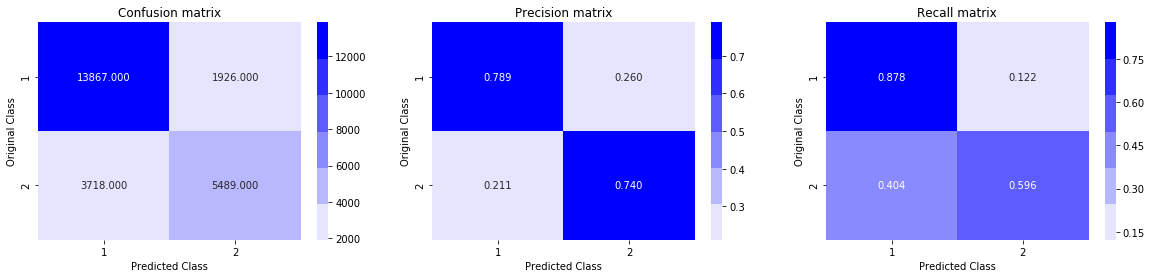

In [0]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# Optional

* Following is the easy code i.e xgb.XGBClassifier()
* While xgb.train() approach that we have used previously is the detailed version of xgb.XGBClassifier() i.e xgb.XGBClassifier() internally executes the same code of xgb.train()
* So above two approaches does the same thing. Only difference that...with xgb.train() approach we can decide to early stop by passing variety of parameters unlike in xgb.XGBClassifier() case.
* Also notice that, **xgb.train(---).predict(test) -> gives the probability** and not the class labels **unlike xgb.XGBClassifier()** which has two different functions i.e **.predict() & .predict_proba()**


In [0]:
m=xgb.XGBClassifier(max_depth=20,n_estimators=20,learning_rate=0.1,eval_metric='logloss')
m.fit(tfidf_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=20, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

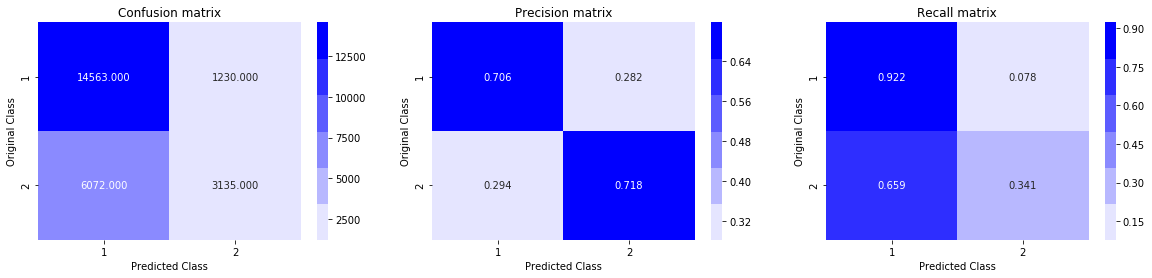

In [0]:
p=m.predict(tfidf_test)
plot_confusion_matrix(y_test,p)

# Model Performance Evaluation:-


In [0]:
from prettytable import PrettyTable

table=PrettyTable()
table.field_names=["Vectorization","--","LR (logloss)"]

table.add_row(["---","Train","Test"])

tfidf=["TFIDF_W2V",0.5855,0.5877]
tfidfw2v=['TFIDF',0.4722,0.5191]

table.add_row(tfidf)
table.add_row(tfidfw2v)

print(table)
print("##############################################")

from prettytable import PrettyTable

table=PrettyTable()
table.field_names=["Vectorization","--","Lr.SVM (logloss)"]

table.add_row(["---","Train","Test"])

tfidf=["TFIDF_W2V",0.6094,0.6108]
tfidfw2v=['TFIDF',0.4733,0.5270]

table.add_row(tfidf)
table.add_row(tfidfw2v)

print(table)
print("##############################################")

from prettytable import PrettyTable

table=PrettyTable()
table.field_names=["Vectorization","--","XGB (logloss)"]

table.add_row(["---","Train","Test"])

tfidf=["TFIDF_W2V",0.3230,0.3690]
tfidfw2v=['TFIDF',0.3860,0.5550]

table.add_row(tfidf)
table.add_row(tfidfw2v)

print(table)

+---------------+--------+--------------+
| Vectorization |   --   | LR (logloss) |
+---------------+--------+--------------+
|      ---      | Train  |     Test     |
|   TFIDF_W2V   | 0.5855 |    0.5877    |
|     TFIDF     | 0.4722 |    0.5191    |
+---------------+--------+--------------+
##############################################
+---------------+--------+------------------+
| Vectorization |   --   | Lr.SVM (logloss) |
+---------------+--------+------------------+
|      ---      | Train  |       Test       |
|   TFIDF_W2V   | 0.6094 |      0.6108      |
|     TFIDF     | 0.4733 |      0.527       |
+---------------+--------+------------------+
##############################################
+---------------+-------+---------------+
| Vectorization |   --  | XGB (logloss) |
+---------------+-------+---------------+
|      ---      | Train |      Test     |
|   TFIDF_W2V   | 0.323 |     0.369     |
|     TFIDF     | 0.386 |     0.555     |
+---------------+-------+-------------

# Conclusion:-

1. Very 1st observation from above table is that , **XGBoostClassifier is doing pretty well** on both vectorizing technique than linear SVM & LogisticRegression
2. Coming to vectorizer technique, it seems that, TFIDF vectorizer is showing quite difference between log loss of train & test data in all 3 models than TFIDF_W2V technique. Which indicates, **TFIDF based classifiers are getting overfitted.**
3. But again, though chances of model being overfited is more in TFIDF case, the log loss is better than TFIDF_W2V based models.

# Procedure:-

1. At the very beginning , basic statistics like no. of questions, repeated questions, unique questions, is there any duplicate question...all these were examined.

2. Once got the brief idea about about the basic stats of data, data cleaning were is done for ex. finding out NULL entries if any and accordingly filling it with an appropriate value.

3. Then using the statistics obtained so far, all the basic feature extraction were performed like no. of questions, length of question, total no. of words , etc...

4. Once we got the basic features , then we performed EDA on obtained those feature to get the more clear idea about how they are related with each other , are they of an importance in building a model, etc...We also0 used some visualisation tools to get the visuals of features behaviour.

5. Now we have a dataset with basic features and have an idea about the features behaviour. Then we performed data cleaning/pre-processing like removing unnecessary tags, removing stopwords, performed stemming , lemmatization on text data, etc...

6. We then tried to understand data in more depth and extracted more advanced features. We used packages like fuzzywuzzy to extract the features in addition to feature engineering.

7. Again we performed EDA on newly extracted features to get the more idea about how features are behaving. Also used some visualisation plots for this  purpose.

8. Once we got the data with all the features we tried to visualise all these nD features into 2-D space using state of the art called "TSNE".
It was found that data can be decently classified into two class labels.

9. Then comes the text data featurisation. We used two vectorizer techniques to featurise text data i.e TFIDF & TFIDF_W2V and obtained numeric representation of text data.

10. Now we are done playing with data. It was a time to build a model. But before that to have a reference model performance metric, we first built a random model and obtained the log loss of random model. This log loss value was then was then further used as a reference to evaluate the more complex models.

11. We then tried bulding different ML models using multiple classification algorithms. We used LogisticRegression, LinearSVM & XGBoostClassifier to train the classifier.

12. Finally we evaluated all these classifiers and presented the conclusions  about each model and the best amongst them.